### Why do we use Logistic Regression rather than Linear Regression?

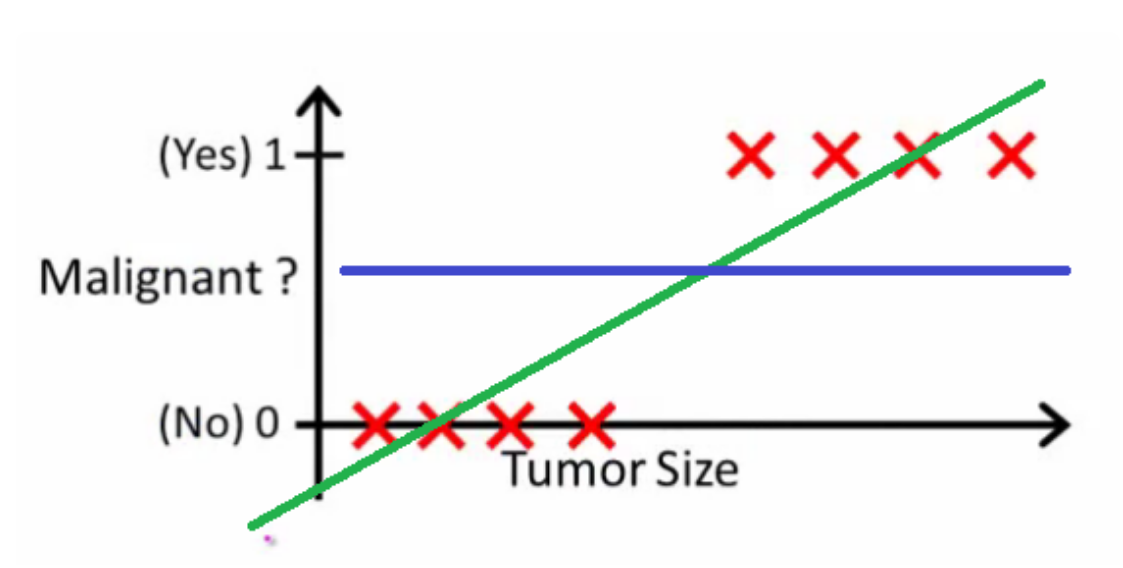



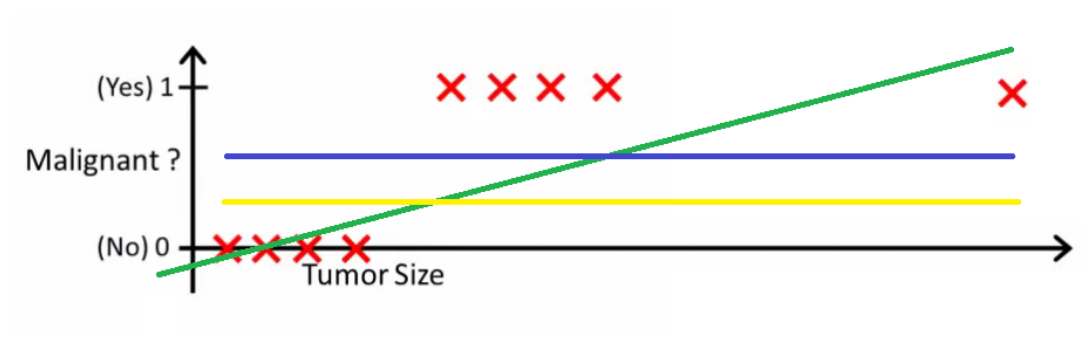

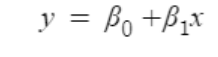
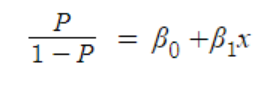
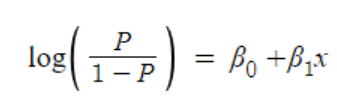
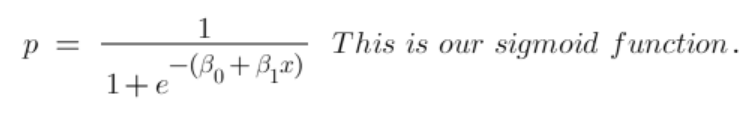
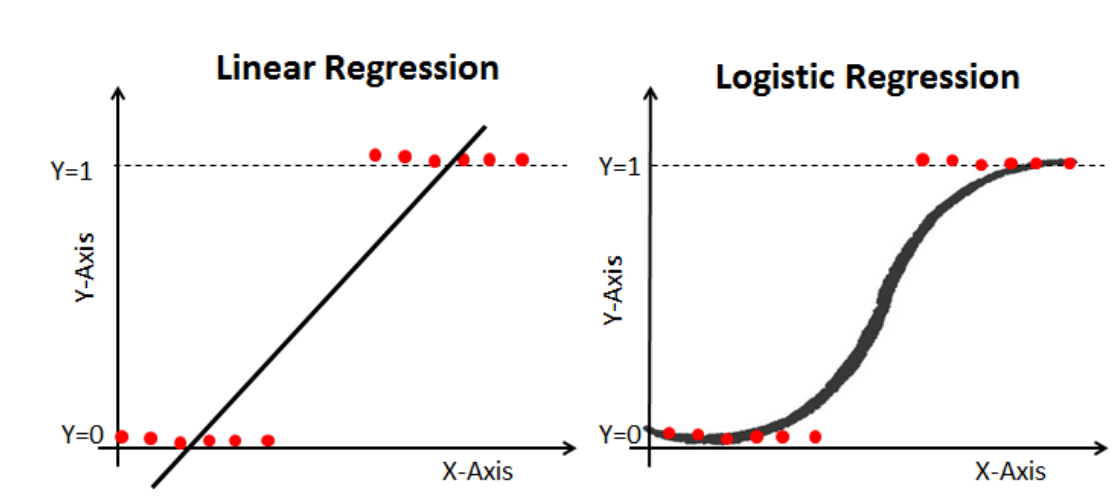


### Metrics to Evaluate your Classification Model

#### confusion Metrics

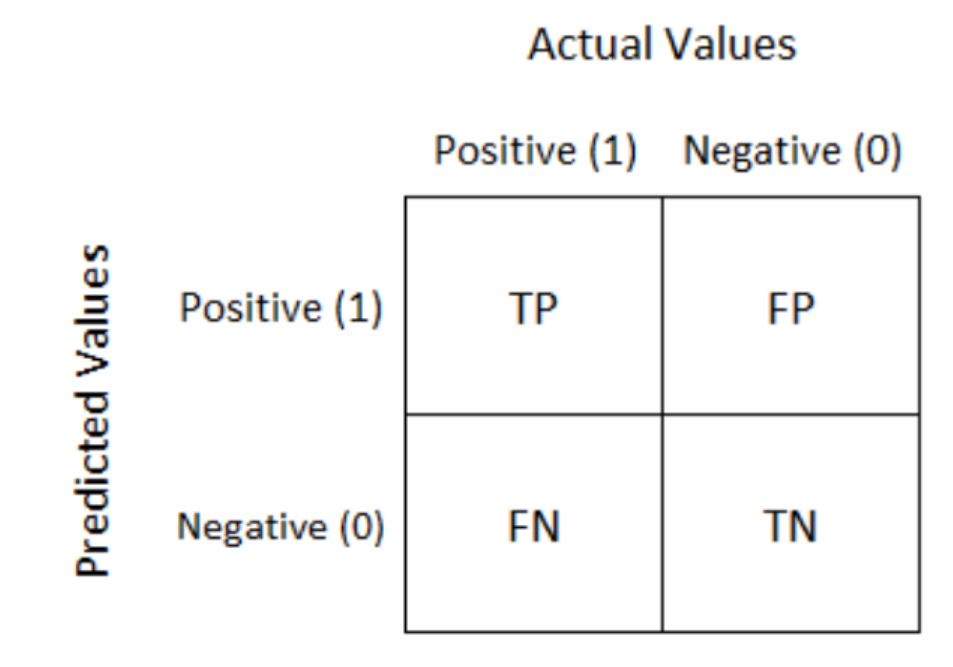



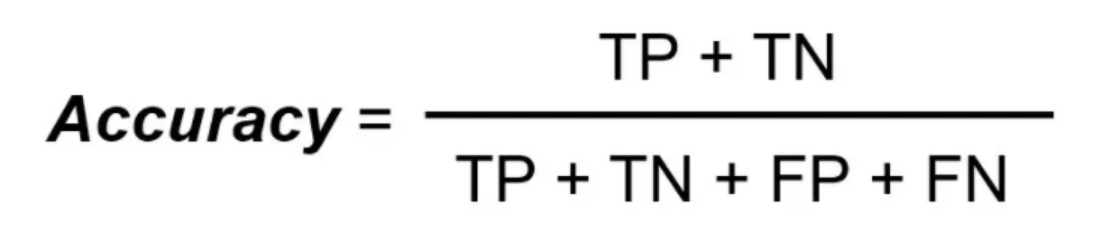
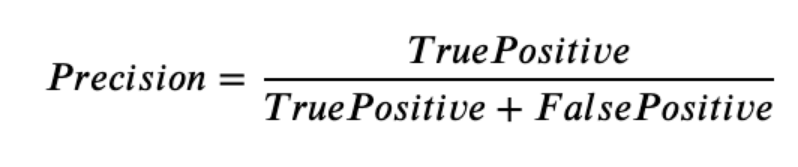
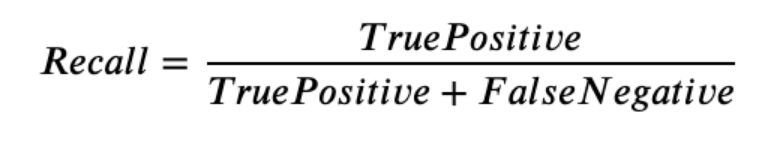
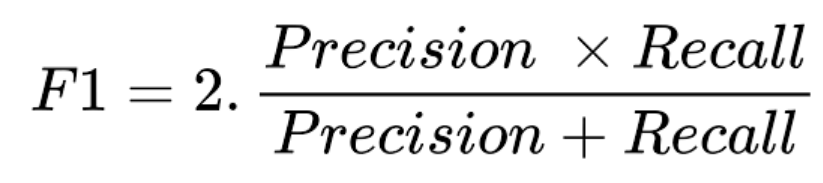


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load the data

In [2]:
df=pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df['Age'].mean()

29.69911764705882

In [6]:
df['Age'].median()

28.0

In [7]:
df.shape

(891, 12)

In [8]:
df['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [9]:
df['Age'].var()

211.0191247463081

In [10]:
df['Age'].std()

14.526497332334044

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
len(df.index)

891

# analyzing data

<Axes: xlabel='Survived', ylabel='count'>

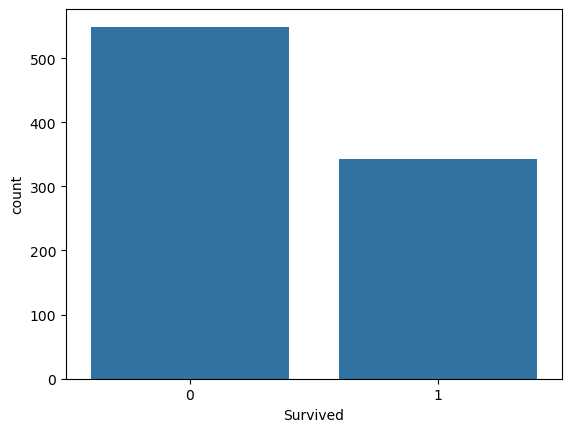

In [13]:
sns.countplot(data=df,x='Survived')

<Axes: xlabel='Survived', ylabel='count'>

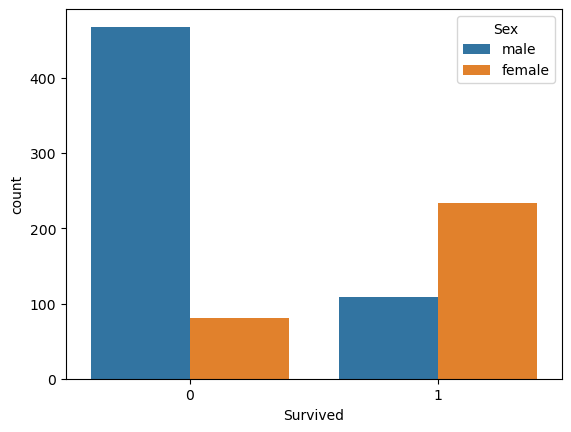

In [14]:
sns.countplot(data=df,x='Survived',hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

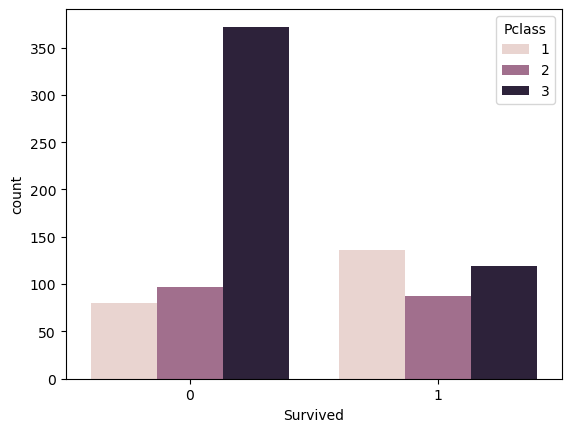

In [15]:
sns.countplot(data=df,x='Survived',hue='Pclass')

<Axes: ylabel='Frequency'>

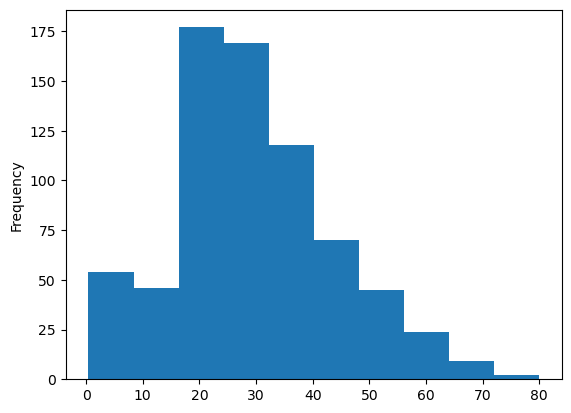

In [16]:
df['Age'].plot.hist()

<Axes: ylabel='Frequency'>

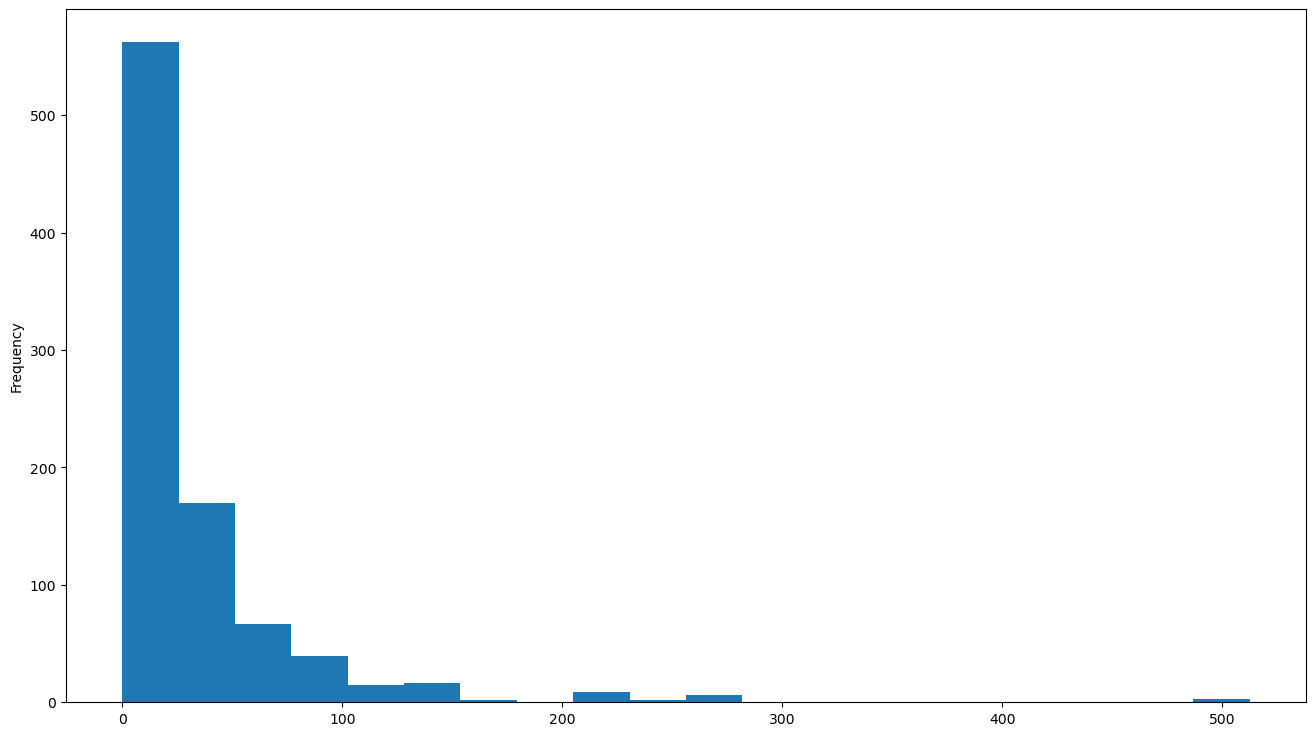

In [17]:
df['Fare'].plot.hist(bins=20,figsize=(16,9))

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='SibSp', ylabel='count'>

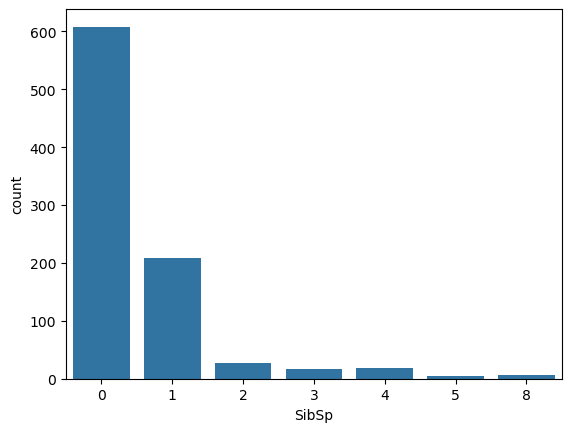

In [19]:
sns.countplot(data=df,x='SibSp')

# data wrangling (cleaning data)

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
df["Age"] = df["Age"].fillna(value=df["Age"].mean())

<Axes: >

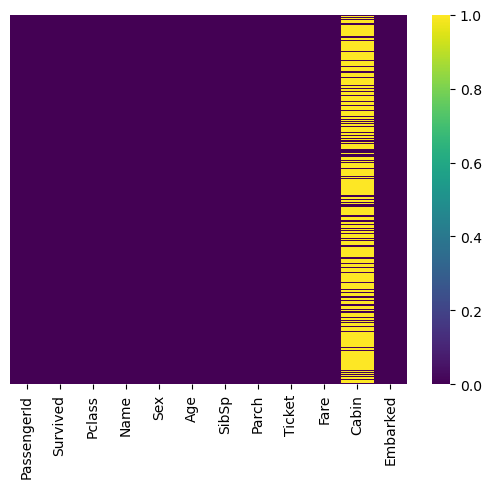

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

<Axes: xlabel='Pclass', ylabel='Age'>

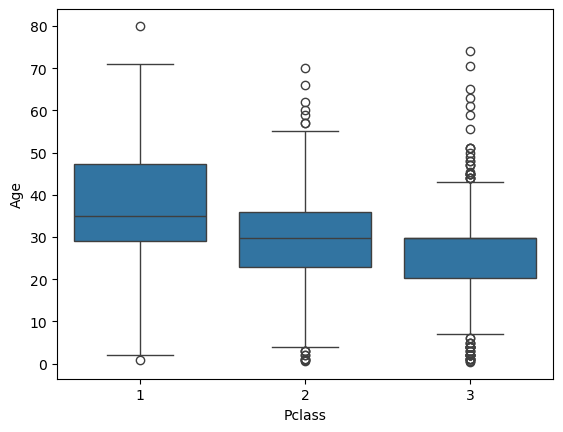

In [23]:
sns.boxplot(data=df,x='Pclass',y='Age')

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df.drop('Cabin',axis=1,inplace=True)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
df.dropna(inplace=True)

<Axes: >

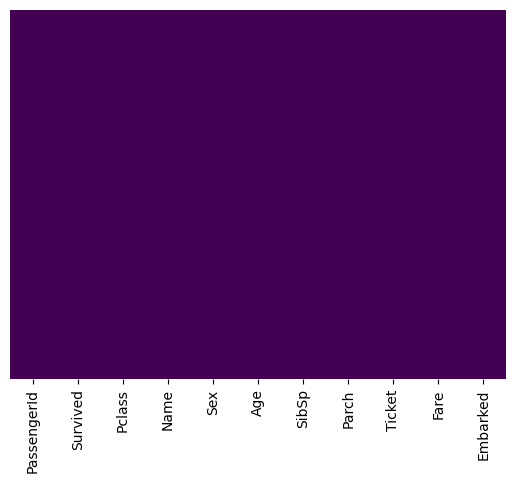

In [28]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [30]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [31]:
embark=pd.get_dummies(df['Embarked'],drop_first=True)
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [32]:
pcl=pd.get_dummies(df['Pclass'],drop_first=True)
pcl.head()

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True


In [33]:
df=pd.concat([df,sex,embark,pcl],axis=1)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True,False,True


In [35]:
df.drop(['Sex','Embarked','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [36]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,True,False,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,3,35.0,0,0,8.0500,True,False,True,False,True


In [37]:
df.drop('Pclass',axis=1,inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Age       889 non-null    float64
 2   SibSp     889 non-null    int64  
 3   Parch     889 non-null    int64  
 4   Fare      889 non-null    float64
 5   male      889 non-null    bool   
 6   Q         889 non-null    bool   
 7   S         889 non-null    bool   
 8   2         889 non-null    bool   
 9   3         889 non-null    bool   
dtypes: bool(5), float64(2), int64(3)
memory usage: 46.0 KB


# Train and Test Data

In [39]:
X=df.drop('Survived',axis=1)
y=df['Survived']
X.columns = X.columns.astype(str)

In [40]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split


In [41]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [42]:
from sklearn.linear_model import LogisticRegression


In [43]:
logmodel=LogisticRegression(max_iter = 100000 )
logmodel.fit(X_train,y_train)


LogisticRegression(max_iter=100000)

In [44]:
pred=logmodel.predict(X_test)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       166
           1       0.79      0.77      0.78       101

    accuracy                           0.84       267
   macro avg       0.83      0.82      0.82       267
weighted avg       0.83      0.84      0.83       267



In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[145,  21],
       [ 23,  78]], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8352059925093633

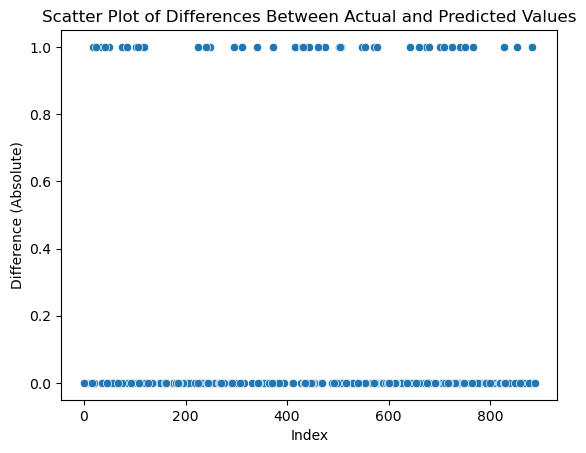

In [59]:

pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': pred,
    'Difference': np.abs(y_test - pred)
})


sns.scatterplot(data=pred_df, x=pred_df.index, y='Difference')


plt.xlabel('Index')
plt.ylabel('Difference (Absolute)')
plt.title('Scatter Plot of Differences Between Actual and Predicted Values')
plt.show()


In [49]:
pred_df

,Actual Value,Predicted Value,Difference
387,1,1,0
259,1,1,0
771,0,0,0
208,1,1,0
683,0,0,0
...,...,...,...
248,1,0,1
601,0,0,0
240,0,1,1
468,0,0,0


# model2 SUV_Data set

In [ ]:
suv_df=pd.read_csv('suv_data.csv')
suv_df.head()


In [ ]:
suv_df.shape

In [ ]:
X=suv_df.iloc[:,[2,3]].values
y=suv_df.iloc[:,4].values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred=logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
sns.countplot(data=suv_df,x='Gender',hue='Purchased')